In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/KDDTrain+.txt')
df_test = pd.read_csv('/content/drive/MyDrive/KDDTest+.txt')

print("Shapes of training and testing are:",df_train.shape,df_test.shape)


Shapes of training and testing are: (125972, 43) (22543, 43)


In [ ]:

names = ["duration","protocol","service","flag","src_bytes",
        "dst_bytes","land","wrong_fragment","urgent","hot",
        "num_failed_logins","logged_in","num_compromised",
        "root_shell","su_attempted","num_root","num_file_creations",
        "num_shells","num_access_files","num_outbound_cmds",
        "is_host_login","is_guest_login","count","srv_count",
        "serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
        "same_srv_rate","diff_srv_rate","srv_diff_host_rate",
        "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
        "dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
        "dst_host_serror_rate","dst_host_srv_serr_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate",
        "attack_type","other"]

In [ ]:
df_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/KDDTrain+.txt',names=names,header=None)
df_test = pd.read_csv('/content/drive/MyDrive/KDDTest+.txt',names=names,header=None)

In [ ]:
df_train.head()

,duration,protocol,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serr_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,other
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:

print("Shapes of training and testing are:",df_train.shape,df_test.shape)

full_dataset = pd.concat([df_train,df_test])#concatinated the datasets to escape from the underfit condition
full_dataset['label'] = full_dataset['attack_type']

Shapes of training and testing are: (125973, 43) (22544, 43)


In [ ]:
full_dataset.head()

,duration,protocol,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serr_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,other,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [ ]:
 full_dataset['label'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [ ]:
full_dataset.loc[full_dataset.label == 'neptune','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'back','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'land','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'pod','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'smurf','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'teardrop','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'mailbomb','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'processtable','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'udpstorm','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'apache2','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'worm','label'] = 'DOS'

In [ ]:
full_dataset.loc[full_dataset.label == 'buffer_overflow','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'loadmodule','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'perl','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'rootkit','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'sqlattack','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'xterm','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'ps','label'] = 'U2R'

In [ ]:

full_dataset.loc[full_dataset.label == 'ftp_write','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'guess_passwd','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'imap','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'multihop','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'phf','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'spy','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'warezclient','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'warezmaster','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'xlock','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'xsnoop','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'snmpgetattack','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'httptunnel','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'snmpguess','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'sendmail','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'named','label'] = 'R2L'

In [ ]:

full_dataset.loc[full_dataset.label == 'satan','label'] = 'Probe'
full_dataset.loc[full_dataset.label == 'ipsweep','label'] = 'Probe'
full_dataset.loc[full_dataset.label == 'nmap','label'] = 'Probe'
full_dataset.loc[full_dataset.label == 'portsweep','label'] = 'Probe'
full_dataset.loc[full_dataset.label == 'saint','label'] = 'Probe'
full_dataset.loc[full_dataset.label == 'mscan','label'] = 'Probe'

In [ ]:
full_dataset.head()

,duration,protocol,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serr_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,other,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DOS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [ ]:
full_dataset['label'].unique()

array(['normal', 'DOS', 'R2L', 'Probe', 'U2R'], dtype=object)

In [ ]:
print('Distribution of Label in Fraction')
full_dataset['label'].value_counts(normalize=True)

Distribution of Label in Fraction


normal    0.518823
DOS       0.359467
Probe     0.094784
R2L       0.026125
U2R       0.000801
Name: label, dtype: float64

In [ ]:
full_dataset['label']=full_dataset['label'].replace('normal',0)
full_dataset['label']=full_dataset['label'].replace('DOS',1)
full_dataset['label']=full_dataset['label'].replace('Probe',1)
full_dataset['label']=full_dataset['label'].replace('R2L',1)
full_dataset['label']=full_dataset['label'].replace('U2R',1)


In [ ]:
print('Label Distribution in terms of 0 and 1')
full_dataset['label'].value_counts()

Label Distribution in terms of 0 and 1


0    77054
1    71463
Name: label, dtype: int64

In [ ]:

full_dataset = full_dataset.drop(['other','attack_type'],axis=1)
print("Unique Labels",full_dataset.label.unique())
full_dataset_svm = full_dataset.copy()

Unique Labels [0 1]


In [ ]:

full_dataset.shape

(148517, 42)

In [ ]:
full_dataset = pd.get_dummies(full_dataset,drop_first=False)

In [ ]:
full_dataset.shape

(148517, 123)

Data prepocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

cols_to_norm=["duration","src_bytes",'dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
                 "num_compromised",'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','is_host_login','is_guest_login','count','srv_count',
                 "serror_rate",'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
                 "dst_host_srv_count",'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                 'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serr_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','protocol_icmp','protocol_tcp',
                 "protocol_udp",'service_IRC',"service_X11",'service_Z39_50','service_aol','service_auth','service_bgp','service_courier','service_csnet_ns','service_ctf',
                 "service_daytime",'service_discard','service_domain','service_domain_u','service_echo','service_eco_i','service_ecr_i',
                 "service_efs",'service_exec','service_finger','service_ftp','service_ftp_data',"service_gopher",
                 "service_harvest",'service_hostnames','service_http','service_http_2784','service_http_443','service_http_8001','service_imap4',
                 "service_iso_tsap",'service_klogin','service_kshell','service_ldap','service_link','service_login','service_mtp','service_name','service_netbios_dgm',
                 "service_netbios_ns",'service_netbios_ssn','service_netstat','service_nnsp','service_nntp','service_ntp_u','service_other','service_pm_dump','service_pop_2','service_pop_3','service_printer','service_private','service_red_i','service_remote_job',
                 "service_rje",'service_shell','service_smtp','service_sql_net','service_ssh','service_sunrpc','service_supdup','service_systat','service_telnet','service_tftp_u','service_tim_i',
                 "service_time","service_urh_i",'service_urp_i','service_uucp','service_uucp_path','service_vmnet','service_whois','flag_OTH','flag_REJ','flag_RSTO','flag_RSTOS0','flag_RSTR','flag_S0','flag_S1','flag_S2','flag_S3','flag_SF','flag_SH']

In [ ]:
scaler = StandardScaler()

In [ ]:
full_dataset[cols_to_norm] = scaler.fit_transform(full_dataset[cols_to_norm])

<Axes: >

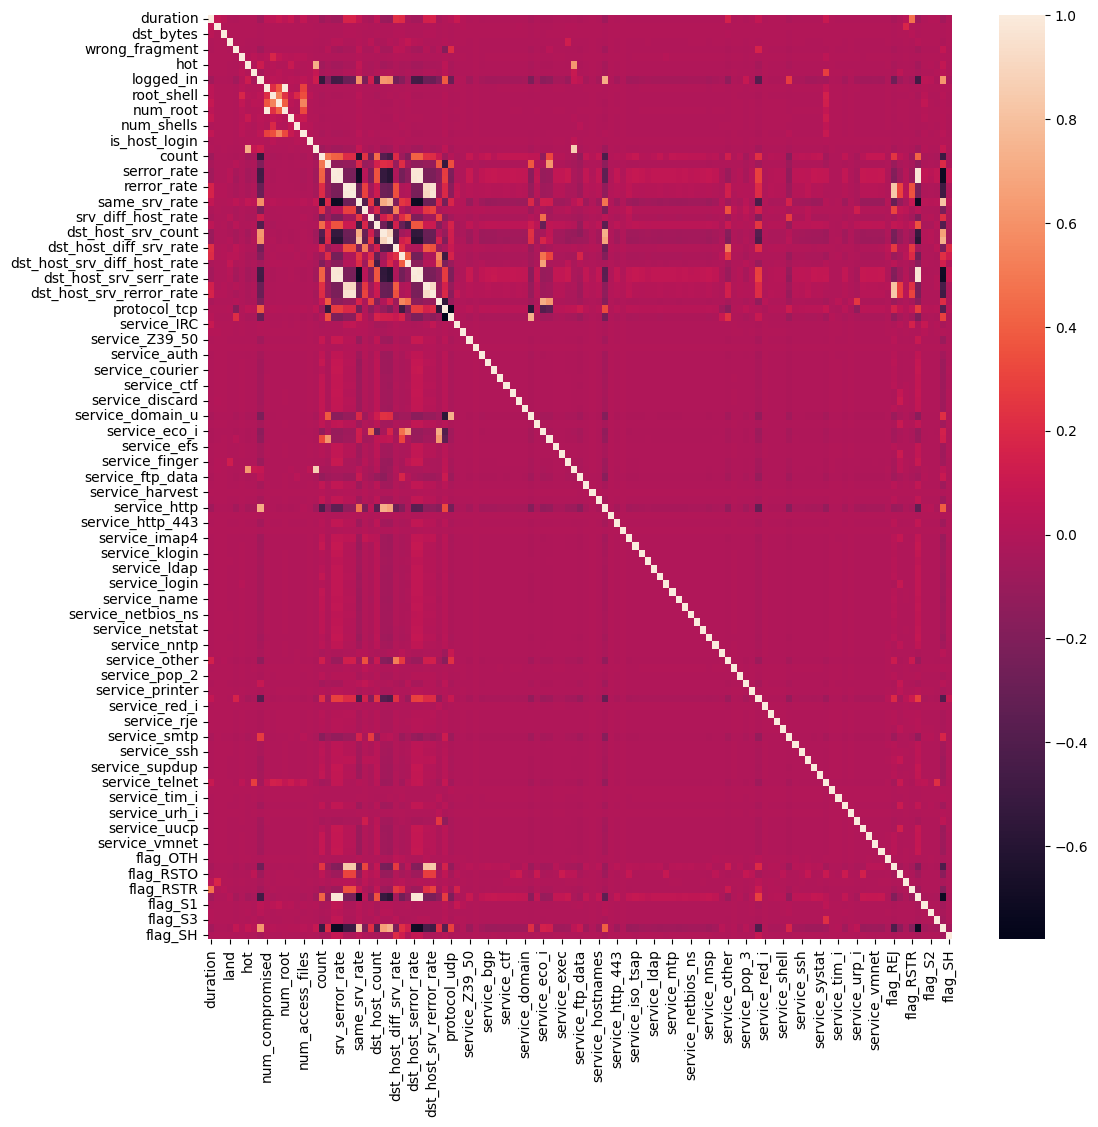

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_df = full_dataset[cols_to_norm].corr(method='pearson')
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_df)

In [ ]:
attack_vs_protocol = pd.crosstab(df_train.attack_type, df_train.protocol)
attack_vs_protocol

protocol,icmp,tcp,udp
attack_type,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

def bake_pies(data_list,labels):
    list_length = len(data_list)

    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}

    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)

    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list):

        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
              if value not in cdict:
                cdict[value] = next(color_cycle)

        # build the wedges
        wedges,texts = axs[count].pie(data_set,colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])

    return axs


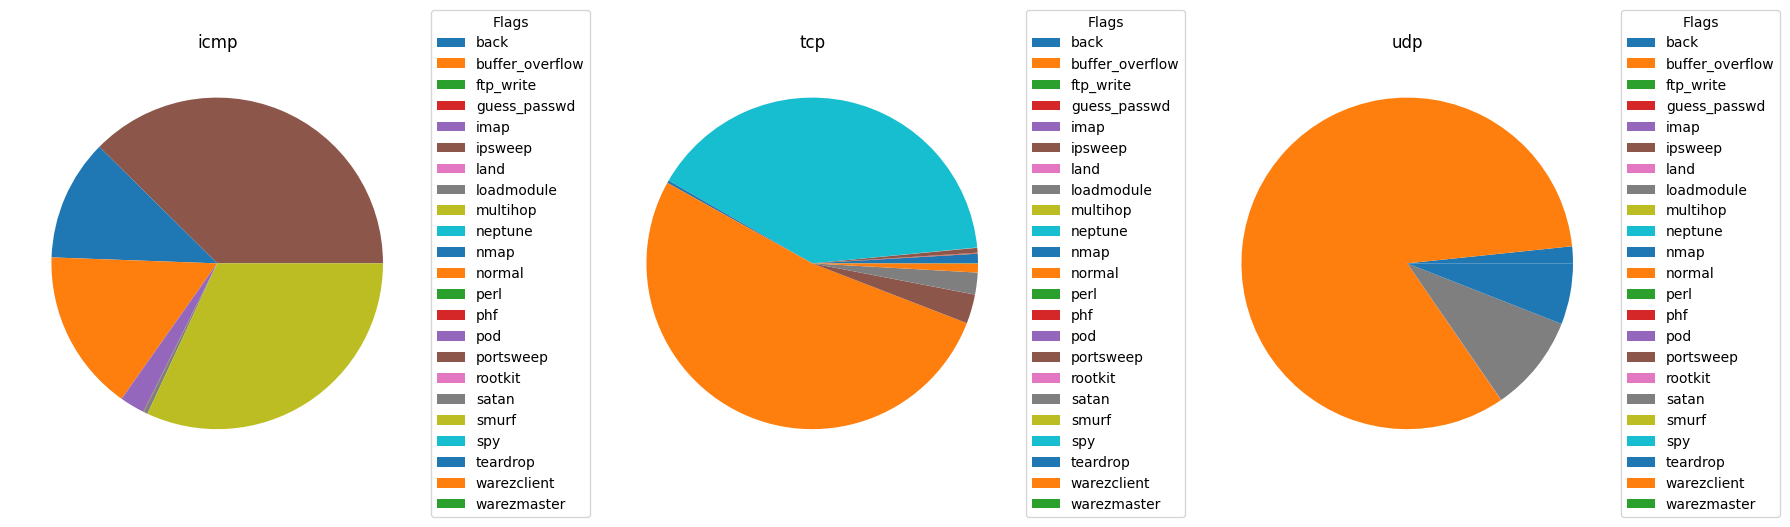

In [ ]:
import numpy as np
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

# create the charts
bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

In [ ]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Columns: 123 entries, duration to flag_SH
dtypes: float64(121), int64(2)
memory usage: 140.5 MB


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:

X=full_dataset.drop('label',axis=1)
y=full_dataset.label

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.head(122)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
19924,-0.112075,-0.006956,-0.004535,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391,-0.048183
77854,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.33621,-0.126385,-0.026599,-0.145766,1.740339,-0.051047,-0.030936,-0.044839,-1.237025,-0.048183
19105,-0.112481,-0.007385,-0.001035,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391,-0.048183
118322,-0.112481,-0.007394,-0.004187,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391,-0.048183
116812,-0.112481,-0.007396,-0.004484,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391,-0.048183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,-0.112481,-0.007382,0.002542,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391,-0.048183
17484,-0.111262,-0.007249,-0.004526,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391,-0.048183
64465,11.066160,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.33621,-0.126385,-0.026599,6.860303,-0.574601,-0.051047,-0.030936,-0.044839,-1.237025,-0.048183
110232,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.33621,-0.126385,-0.026599,-0.145766,1.740339,-0.051047,-0.030936,-0.044839,-1.237025,-0.048183


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gb=GaussianNB()

In [ ]:
gb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=gb.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[23043    59]
 [ 8273 13181]]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
print(accuracy_score(y_test,y_pred))



0.8129993715773409


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already trained and obtained predictions y_pred and y_pred_proba

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



Precision: 0.9955438066465256
Recall: 0.6143842640067121
F1 Score: 0.7598432005534098


SVC

In [ ]:
from sklearn.svm  import SVC

model = SVC()  # Corrected parameter name
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))


0.9833467995331717


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Assuming you have already trained and obtained predictions y_pred


print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Precision: 0.9865626761886863
Recall: 0.9787452223361611
F1 Score: 0.9826384014226215


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[22816   286]
 [  456 20998]]


DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model= DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[22983   119]
 [  136 21318]]


In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9942768650686776
0.9944488501189532
0.993660855784469
0.9940546967895363


In [ ]:
for column in full_dataset:
    print(column)

duration
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serr_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
label
protocol_icmp
protocol_tcp
protocol_udp
service_IRC
service_X11
service_Z39_50
service_aol
service_auth
service_bgp
service_courier
service_csnet_ns
service_ctf
service_daytime
service_discard
service_domain
service_domain_u
service_echo
service_eco_i
service_ecr_i
service_efs
service_exec
service_finger
service_ftp
service_ftp_data
service_gopher
service_harvest
service_hostnames
service_http
service_http_2784
ser

Feature Selection using chi


In [ ]:
y.shape

(148517,)

In [ ]:
import pandas as pd

# Assuming you have a Pandas DataFrame called 'full_dataset' and a variable 'y' with the data you want to add

# Create a new column in 'full_dataset' and populate it with the values from 'y'
full_dataset['label'] = y


In [ ]:
full_dataset.shape

(148517, 123)

In [ ]:
input_variables=["duration","src_bytes",'dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
                 "num_compromised",'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','is_host_login','is_guest_login','count','srv_count',
                 "serror_rate",'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
                 "dst_host_srv_count",'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                 'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serr_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','protocol_icmp','protocol_tcp',
                 "protocol_udp",'service_IRC',"service_X11",'service_Z39_50','service_aol','service_auth','service_bgp','service_courier','service_csnet_ns','service_ctf',
                 "service_daytime",'service_discard','service_domain','service_domain_u','service_echo','service_eco_i','service_ecr_i',
                 "service_efs",'service_exec','service_finger','service_ftp','service_ftp_data',"service_gopher",
                 "service_harvest",'service_hostnames','service_http','service_http_2784','service_http_443','service_http_8001','service_imap4',
                 "service_iso_tsap",'service_klogin','service_kshell','service_ldap','service_link','service_login','service_mtp','service_name','service_netbios_dgm',
                 "service_netbios_ns",'service_netbios_ssn','service_netstat','service_nnsp','service_nntp','service_ntp_u','service_other','service_pm_dump','service_pop_2','service_pop_3','service_printer','service_private','service_red_i','service_remote_job',
                 "service_rje",'service_shell','service_smtp','service_sql_net','service_ssh','service_sunrpc','service_supdup','service_systat','service_telnet','service_tftp_u','service_tim_i',
                 "service_time","service_urh_i",'service_urp_i','service_uucp','service_uucp_path','service_vmnet','service_whois','flag_OTH','flag_REJ','flag_RSTO','flag_RSTOS0','flag_RSTR','flag_S0','flag_S1','flag_S2','flag_S3','flag_SF','flag_SH']

In [ ]:
from scipy.stats import chi2_contingency
l=[]
# Loop through each input variable
for input_var in input_variables:
    contingency_table = pd.crosstab(full_dataset[input_var], full_dataset['label'])
    stat, p, dof, expected = chi2_contingency(contingency_table)

    alpha = 0.05  # Significance level
    if p <= alpha:
        print(f"{input_var} and {'label'} are dependent.")
    else:
        print(f"{input_var} and {'label'} are independent.")
        l.append(input_var)
print(l)

duration and label are dependent.
src_bytes and label are dependent.
dst_bytes and label are dependent.
land and label are dependent.
wrong_fragment and label are dependent.
urgent and label are independent.
hot and label are dependent.
num_failed_logins and label are dependent.
logged_in and label are dependent.
num_compromised and label are dependent.
root_shell and label are dependent.
su_attempted and label are dependent.
num_root and label are dependent.
num_file_creations and label are dependent.
num_shells and label are independent.
num_access_files and label are dependent.
is_host_login and label are dependent.
is_guest_login and label are independent.
count and label are dependent.
srv_count and label are dependent.
serror_rate and label are dependent.
srv_serror_rate and label are dependent.
rerror_rate and label are dependent.
srv_rerror_rate and label are dependent.
same_srv_rate and label are dependent.
diff_srv_rate and label are dependent.
srv_diff_host_rate and label ar

In [ ]:
full_dataset=full_dataset.drop(['urgent', 'num_shells', 'is_guest_login', 'service_aol','service_harvest',"num_compromised", 'service_http_2784', 'service_http_8001', 'service_other', 'service_tftp_u', 'service_tim_i']
,axis=1)

In [ ]:
full_dataset.shape

(148517, 112)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X=full_dataset.drop('label',axis=1)
y=full_dataset['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[23045    57]
 [ 8237 13217]]


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8138522309004399
0.6160622727696466
0.9957058912159108
0.761172540889196


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X=full_dataset.drop('label',axis=1)
y=full_dataset['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model= DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:

y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[22989   113]
 [  131 21323]]


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9945237453990484
0.9938939125570989
0.9947284941220377
0.9943110282117044


SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import train_test_split
X=full_dataset.drop('label',axis=1)
y=full_dataset['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model= SVC()
model.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[22798   304]
 [  447 21007]]


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9831448065355957
0.9791647245268947
0.985735066397635
0.9824389103238629


Anova

In [ ]:
full_dataset.isna().sum()

duration          0
src_bytes         0
dst_bytes         0
land              0
wrong_fragment    0
                 ..
flag_S1           0
flag_S2           0
flag_S3           0
flag_SF           0
flag_SH           0
Length: 112, dtype: int64

In [ ]:
full_dataset.isna().sum().sum()

0

In [ ]:
full_dataset['label'].isna().sum()

0

In [ ]:
full_dataset=full_dataset.replace([np.inf,-np.inf], np.nan)

In [ ]:
full_dataset=full_dataset.dropna()

In [ ]:
full_dataset.isna().sum().sum()

0

In [ ]:
full_dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,root_shell,su_attempted,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,1.485170e+05,1.485170e+05,1.485170e+05,1.485170e+05,1.485170e+05,1.485170e+05,1.485170e+05,1.485170e+05,1.485170e+05,1.485170e+05,...,1.485170e+05,1.485170e+05,1.485170e+05,1.485170e+05,1.485170e+05,1.485170e+05,1.485170e+05,1.485170e+05,1.485170e+05,1.485170e+05
mean,-5.501890e-18,-1.722331e-18,-7.176378e-19,6.650110e-18,-1.918485e-17,8.611653e-18,-1.071672e-17,-1.063061e-16,-1.227161e-17,-1.545313e-17,...,-3.636031e-17,-3.980498e-17,-1.267827e-17,9.090079e-18,6.583131e-17,1.071672e-17,-1.751036e-17,-1.607509e-17,-1.326195e-16,1.925661e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.124811e-01,-7.436409e-03,-4.614229e-03,-1.468026e-02,-8.548778e-02,-9.407084e-02,-5.983194e-02,-8.212489e-01,-3.886545e-02,-2.303241e-02,...,-3.362100e-01,-1.263853e-01,-2.659868e-02,-1.457662e-01,-5.746005e-01,-5.104705e-02,-3.093597e-02,-4.483903e-02,-1.237025e+00,-4.818309e-02
25%,-1.124811e-01,-7.436409e-03,-4.614229e-03,-1.468026e-02,-8.548778e-02,-9.407084e-02,-5.983194e-02,-8.212489e-01,-3.886545e-02,-2.303241e-02,...,-3.362100e-01,-1.263853e-01,-2.659868e-02,-1.457662e-01,-5.746005e-01,-5.104705e-02,-3.093597e-02,-4.483903e-02,-1.237025e+00,-4.818309e-02
50%,-1.124811e-01,-7.428275e-03,-4.614229e-03,-1.468026e-02,-8.548778e-02,-9.407084e-02,-5.983194e-02,-8.212489e-01,-3.886545e-02,-2.303241e-02,...,-3.362100e-01,-1.263853e-01,-2.659868e-02,-1.457662e-01,-5.746005e-01,-5.104705e-02,-3.093597e-02,-4.483903e-02,8.083909e-01,-4.818309e-02
75%,-1.124811e-01,-7.385019e-03,-4.460051e-03,-1.468026e-02,-8.548778e-02,-9.407084e-02,-5.983194e-02,1.217658e+00,-3.886545e-02,-2.303241e-02,...,-3.362100e-01,-1.263853e-01,-2.659868e-02,-1.457662e-01,-5.746005e-01,-5.104705e-02,-3.093597e-02,-4.483903e-02,8.083909e-01,-4.818309e-02
max,2.334247e+01,2.550882e+02,3.536968e+02,6.811869e+01,1.241096e+01,5.007598e+01,6.914625e+01,1.217658e+00,2.572979e+01,4.715911e+01,...,2.974332e+00,7.912314e+00,3.759585e+01,6.860303e+00,1.740339e+00,1.958977e+01,3.232483e+01,2.230200e+01,8.083909e-01,2.075417e+01


In [ ]:
new_df=full_dataset[['label']]
full_dataset=full_dataset.drop(['label'],axis=1)

In [ ]:
for column in full_dataset.columns:
    full_dataset[column]=(full_dataset[column]-full_dataset[column].min())/(full_dataset[column].max()-full_dataset[column].min())

In [ ]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Columns: 111 entries, duration to flag_SH
dtypes: float64(111)
memory usage: 126.9 MB


In [ ]:
full_dataset.isna().sum().sum()

148517

In [ ]:
import numpy as np
np.isinf(full_dataset).values.sum()

0

In [ ]:
full_dataset.shape

(148517, 111)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [ ]:
train_features, test_features, train_labels, test_labels=train_test_split( full_dataset,new_df,test_size=0.2,random_state=0)

In [ ]:
constant_filter = VarianceThreshold(threshold=0)

In [ ]:
constant_filter.fit(train_features)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_variance_threshold.py:111: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_variance_threshold.py:119: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


VarianceThreshold(threshold=0)

In [ ]:
len(train_features.columns[constant_filter.get_support()])

110

In [ ]:

constant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[constant_filter.get_support()]]

print(len(constant_columns))

1


In [ ]:

for column in constant_columns:
    print(column)

num_outbound_cmds


In [ ]:
full_dataset=full_dataset.drop('num_outbound_cmds',axis=1)


In [ ]:
train_features = constant_filter.transform(train_features)
test_features = constant_filter.transform(test_features)

train_features.shape, test_features.shape

((118813, 110), (29704, 110))

In [ ]:
full_dataset.shape

(148517, 110)

In [ ]:
train_features, test_features, train_labels, test_labels=train_test_split(full_dataset, new_df,test_size=0.2,random_state=0)

In [ ]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(train_features)

len(train_features.columns[constant_filter.get_support()])

constant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[constant_filter.get_support()]]

train_features.drop(labels=constant_columns, axis=1, inplace=True)
test_features.drop(labels=constant_columns, axis=1, inplace=True)

In [ ]:
qconstant_filter = VarianceThreshold(threshold=0.01)

In [ ]:
qconstant_filter.fit(train_features)

VarianceThreshold(threshold=0.01)

In [ ]:
len(train_features.columns[qconstant_filter.get_support()])

38

In [ ]:
qconstant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))

72


In [ ]:
l=[]
for column in qconstant_columns:
    print(column)
    l.append(column)
print(l)

duration
src_bytes
dst_bytes
land
wrong_fragment
hot
num_failed_logins
root_shell
su_attempted
num_root
num_file_creations
num_access_files
is_host_login
service_IRC
service_X11
service_Z39_50
service_auth
service_bgp
service_courier
service_csnet_ns
service_ctf
service_daytime
service_discard
service_domain
service_echo
service_efs
service_exec
service_gopher
service_hostnames
service_http_443
service_imap4
service_iso_tsap
service_klogin
service_kshell
service_ldap
service_link
service_login
service_mtp
service_name
service_netbios_dgm
service_netbios_ns
service_netbios_ssn
service_netstat
service_nnsp
service_nntp
service_ntp_u
service_pm_dump
service_pop_2
service_pop_3
service_printer
service_red_i
service_remote_job
service_rje
service_shell
service_sql_net
service_ssh
service_sunrpc
service_supdup
service_systat
service_time
service_urh_i
service_urp_i
service_uucp
service_uucp_path
service_vmnet
service_whois
flag_OTH
flag_RSTOS0
flag_S1
flag_S2
flag_S3
flag_SH
['duration', 'sr

In [ ]:
full_dataset=full_dataset.drop(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_access_files', 'is_host_login', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_echo', 'service_efs', 'service_exec', 'service_gopher', 'service_hostnames', 'service_http_443', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_red_i', 'service_remote_job', 'service_rje', 'service_shell', 'service_sql_net', 'service_ssh', 'service_sunrpc', 'service_supdup', 'service_systat', 'service_time', 'service_urh_i', 'service_urp_i', 'service_uucp', 'service_uucp_path', 'service_vmnet', 'service_whois', 'flag_OTH', 'flag_RSTOS0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SH']
,axis=1)

In [ ]:
full_dataset.head()

,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,service_ftp_data,service_http,service_private,service_smtp,service_telnet,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_SF
0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.058708,0.062622,0.0,0.0,0.0,0.0,1.00,0.00,0.09,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
full_dataset.shape

(148517, 38)

In [ ]:
full_dataset.corr()

,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,service_ftp_data,service_http,service_private,service_smtp,service_telnet,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_SF
logged_in,1.000000,-0.530779,-0.199018,-0.466492,-0.464952,-0.294629,-0.291349,0.590627,-0.221172,0.122004,...,0.054582,0.708419,-0.383627,0.271212,-0.056342,-0.276112,-0.073997,-0.052190,-0.471858,0.622415
count,-0.530779,1.000000,0.491522,0.410496,0.406663,0.201805,0.202437,-0.616403,0.233640,-0.256859,...,-0.117463,-0.419460,0.224566,-0.161013,-0.062504,0.246352,0.048772,-0.080947,0.419313,-0.500416
srv_count,-0.199018,0.491522,1.000000,-0.135278,-0.134568,-0.114488,-0.114368,0.185365,-0.107297,-0.079083,...,-0.070698,-0.145172,-0.063397,-0.084655,-0.047739,-0.095570,-0.033729,-0.041435,-0.128960,0.199812
serror_rate,-0.466492,0.410496,-0.135278,1.000000,0.991507,-0.228066,-0.225812,-0.711250,0.029606,-0.204260,...,-0.054608,-0.346850,0.296237,-0.122051,0.064342,-0.187637,-0.074517,-0.085315,0.972713,-0.723157
srv_serror_rate,-0.464952,0.406663,-0.134568,0.991507,1.000000,-0.225690,-0.234656,-0.707222,0.026796,-0.206107,...,-0.054850,-0.346088,0.294312,-0.122885,0.064605,-0.196119,-0.073026,-0.084677,0.976825,-0.720526
rerror_rate,-0.294629,0.201805,-0.114488,-0.228066,-0.225690,1.000000,0.986095,-0.273243,0.290202,-0.053626,...,-0.079870,-0.131304,0.204584,-0.087441,-0.001597,0.828608,0.311322,0.353551,-0.221696,-0.493603
srv_rerror_rate,-0.291349,0.202437,-0.114368,-0.225812,-0.234656,0.986095,1.000000,-0.272596,0.292329,-0.052909,...,-0.079982,-0.128827,0.206133,-0.089252,-0.008296,0.837610,0.303242,0.355001,-0.228528,-0.491585
same_srv_rate,0.590627,-0.616403,0.185365,-0.711250,-0.707222,-0.273243,-0.272596,1.000000,-0.387694,0.253639,...,0.094306,0.485425,-0.425375,0.156555,0.016010,-0.301789,-0.114067,0.088856,-0.719395,0.815437
diff_srv_rate,-0.221172,0.233640,-0.107297,0.029606,0.026796,0.290202,0.292329,-0.387694,1.000000,-0.043727,...,-0.029190,-0.226026,0.144792,-0.033288,0.004149,0.308314,0.068135,-0.017928,0.028054,-0.227039
srv_diff_host_rate,0.122004,-0.256859,-0.079083,-0.204260,-0.206107,-0.053626,-0.052909,0.253639,-0.043727,1.000000,...,-0.061066,0.037737,-0.175920,0.272725,-0.023804,-0.045552,0.018937,-0.050969,-0.201454,0.218607


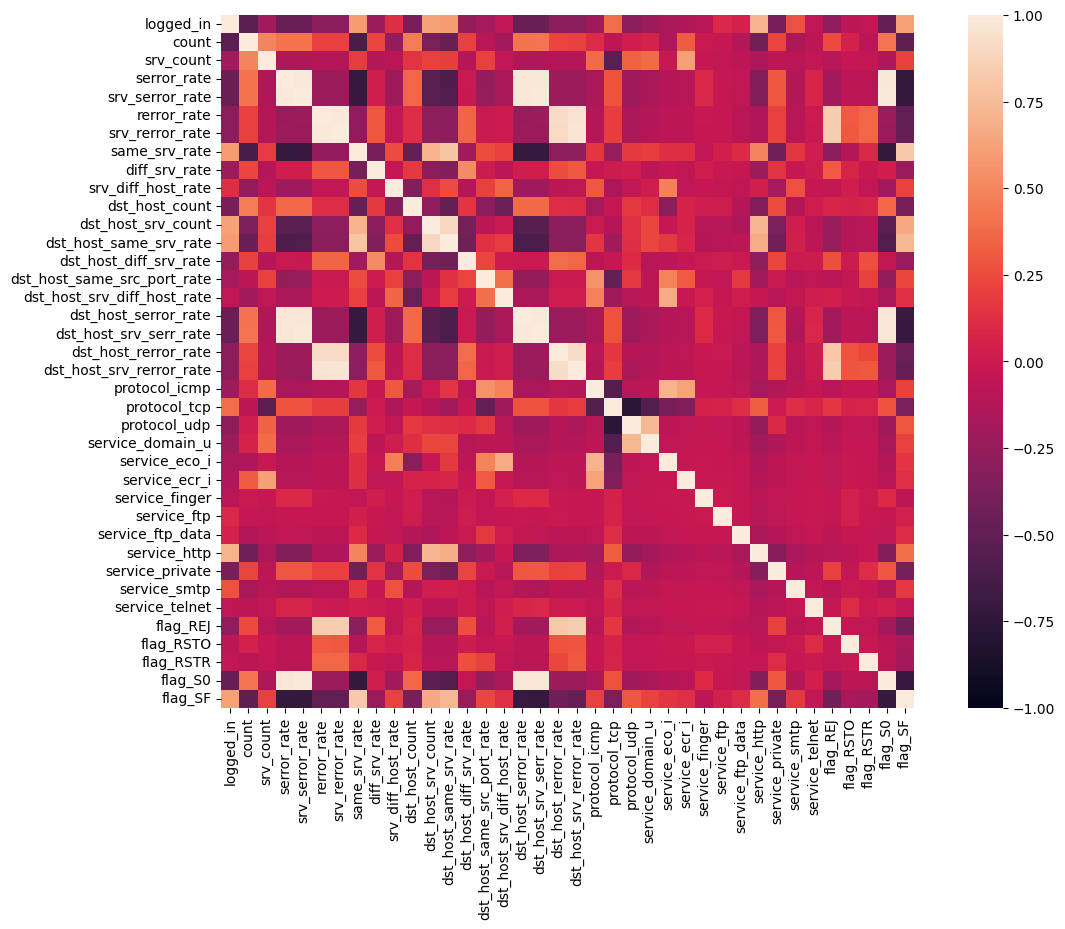

In [ ]:
plt.figure(figsize=(14,9))
sns.heatmap(full_dataset.corr(),vmax=1,vmin=-1,square=True)
plt.show()

DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score ,precision_score,f1_score,recall_score

In [ ]:
from sklearn.model_selection import train_test_split
#X=full_dataset.drop('label',axis=1)
#y=full_dataset['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model= DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[22991   111]
 [  138 21316]]


In [ ]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9944115270670617
0.9948196201054744
0.9941932324339451
0.9935676330754172


Naviebayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,accuracy_score ,precision_score,f1_score,recall_score

In [ ]:

from sklearn.model_selection import train_test_split
#X=full_dataset.drop('label',axis=1)
#y=full_dataset['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model= GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[22991   111]
 [  138 21316]]


In [ ]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9944115270670617
0.9948196201054744
0.9941932324339451
0.9935676330754172


SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,accuracy_score ,precision_score,f1_score,recall_score

In [ ]:
from sklearn.model_selection import train_test_split
#X=full_dataset.drop('label',axis=1)
#y=full_dataset['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model= SVC()
model.fit(X_train,y_train)

SVC()

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

[[22991   111]
 [  138 21316]]
0.9944115270670617
0.9948196201054744
0.9941932324339451
0.9935676330754172


In [ ]:
X_train.shape

(103961, 111)

In [ ]:
X_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,root_shell,su_attempted,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
19924,-0.112075,-0.006956,-0.004535,-0.01468,-0.085488,-0.094071,-0.059832,1.217658,-0.038865,-0.023032,...,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391,-0.048183
77854,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.094071,-0.059832,-0.821249,-0.038865,-0.023032,...,-0.33621,-0.126385,-0.026599,-0.145766,1.740339,-0.051047,-0.030936,-0.044839,-1.237025,-0.048183
19105,-0.112481,-0.007385,-0.001035,-0.01468,-0.085488,-0.094071,-0.059832,1.217658,-0.038865,-0.023032,...,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391,-0.048183
118322,-0.112481,-0.007394,-0.004187,-0.01468,-0.085488,-0.094071,-0.059832,1.217658,-0.038865,-0.023032,...,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391,-0.048183
116812,-0.112481,-0.007396,-0.004484,-0.01468,-0.085488,-0.094071,-0.059832,1.217658,-0.038865,-0.023032,...,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391,-0.048183


In [ ]:
import pandas as pd
l=[]

# Assuming df is your DataFrame
first_row = X_train.iloc[2].values
l.append(first_row)
print(l)
#print(len(l))

[array([-1.12481056e-01, -7.38464916e-03, -1.03546398e-03, -1.46802583e-02,
       -8.54877813e-02, -9.40708355e-02, -5.98319441e-02,  1.21765760e+00,
       -3.88654485e-02, -2.30324137e-02, -1.20642991e-02, -2.33125927e-02,
       -4.21285339e-02,  0.00000000e+00, -8.98918017e-03, -6.10965642e-01,
       -2.15630502e-01, -5.94848240e-01, -5.90269657e-01, -4.06459793e-01,
       -4.05191640e-01,  7.49108116e-01, -3.48092482e-01, -3.76389056e-01,
       -1.74496640e+00,  1.20952071e+00,  1.03887812e+00, -4.33294434e-01,
       -2.13624221e-01,  8.64080698e-02, -5.97719651e-01, -5.84812691e-01,
       -4.22074453e-01, -4.06814676e-01, -2.58964839e-01,  4.70816687e-01,
       -3.66821005e-01, -3.67214255e-02, -2.43490463e-02, -7.83873086e-02,
       -8.32409061e-02, -7.15288079e-02, -7.23797408e-02, -6.25603847e-02,
       -6.39021244e-02, -6.09119174e-02, -6.17415693e-02, -6.47464800e-02,
       -2.67779525e-01, -5.64042871e-02, -1.83696030e-01, -1.62677102e-01,
       -5.91609977e-02, 

In [ ]:
from sklearn.naive_bayes import GaussianNB
m=GaussianNB()
m.fit(X_train,y_train)



GaussianNB()

In [ ]:
y_train.head()

19924     1
77854     1
19105     0
118322    0
116812    0
Name: label, dtype: int64

In [ ]:
import numpy as np
x2=[-1.12481056e-01, -7.38464916e-03, -1.03546398e-03, -1.46802583e-02,
       -8.54877813e-02, -9.40708355e-02, -5.98319441e-02,  1.21765760e+00,
       -3.88654485e-02, -2.30324137e-02, -1.20642991e-02, -2.33125927e-02,
       -4.21285339e-02,  0.00000000e+00, -8.98918017e-03, -6.10965642e-01,
       -2.15630502e-01, -5.94848240e-01, -5.90269657e-01, -4.06459793e-01,
       -4.05191640e-01,  7.49108116e-01, -3.48092482e-01, -3.76389056e-01,
       -1.74496640e+00,  1.20952071e+00,  1.03887812e+00, -4.33294434e-01,
       -2.13624221e-01,  8.64080698e-02, -5.97719651e-01, -5.84812691e-01,
       -4.22074453e-01, -4.06814676e-01, -2.58964839e-01,  4.70816687e-01,
       -3.66821005e-01, -3.67214255e-02, -2.43490463e-02, -7.83873086e-02,
       -8.32409061e-02, -7.15288079e-02, -7.23797408e-02, -6.25603847e-02,
       -6.39021244e-02, -6.09119174e-02, -6.17415693e-02, -6.47464800e-02,
       -2.67779525e-01, -5.64042871e-02, -1.83696030e-01, -1.62677102e-01,
       -5.91609977e-02, -5.81787694e-02, -1.13928315e-01, -1.29403560e-01,
       -2.34015579e-01, -6.10787358e-02, -5.71206089e-02,  1.44285862e+00,
       -6.18513614e-02, -8.03630185e-02, -7.05233444e-02, -5.53738416e-02,
       -4.66859232e-02, -5.38231005e-02, -5.90462779e-02, -5.56179956e-02,
       -5.64042871e-02, -5.74164727e-02, -5.38859769e-02, -5.08477818e-02,
       -5.04469025e-02, -5.10470530e-02, -6.74188462e-02, -4.62493389e-02,
       -3.46403545e-02, -1.18919280e-02, -2.47608588e-02, -9.33489146e-02,
       -2.32152791e-02, -4.67387486e-01, -7.33953603e-03, -2.48966197e-02,
       -2.51659497e-02, -2.33600027e-02, -2.42474236e-01, -4.21186715e-02,
       -4.76892130e-02, -6.04087391e-02, -6.21250055e-02, -5.86430158e-02,
       -1.65918934e-01, -6.83199695e-02, -8.20590600e-03, -6.50081291e-02,
       -7.49666168e-02, -7.05233444e-02, -6.68114693e-02, -7.04268524e-02,
       -1.83514352e-02, -3.36209989e-01, -1.26385279e-01, -2.65986834e-02,
       -1.45766161e-01, -5.74600541e-01, -5.10470530e-02, -3.09359749e-02,
       -4.48390283e-02,  8.08390921e-01, -4.81830940e-02]
x2=np.array(x2).reshape(1,-1)
pred=m.predict(x2)
pred
if(pred==0):
  print("Normal")
else:
  print("Anomaly")

Normal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
l=[]

# Assuming df is your DataFrame
first_row = X_train.iloc[1].values
l.append(first_row)
print(l)
print(len(l))

[array([-1.12481056e-01, -7.43640906e-03, -4.61422891e-03, -1.46802583e-02,
       -8.54877813e-02, -9.40708355e-02, -5.98319441e-02, -8.21248931e-01,
       -3.88654485e-02, -2.30324137e-02, -1.20642991e-02, -2.33125927e-02,
       -4.21285339e-02,  0.00000000e+00, -8.98918017e-03,  2.54054050e-01,
       -3.35042389e-01,  1.72041506e+00,  1.72145852e+00, -4.06459793e-01,
       -4.05191640e-01, -1.47289925e+00, -3.98708714e-02, -3.76389056e-01,
        7.21337702e-01, -9.12171972e-01, -1.03673835e+00, -7.26580852e-02,
       -4.72828747e-01, -2.80649516e-01,  1.73601247e+00,  1.74229525e+00,
       -4.22074453e-01, -4.06814676e-01, -2.58964839e-01,  4.70816687e-01,
       -3.66821005e-01, -3.67214255e-02, -2.43490463e-02, -7.83873086e-02,
       -8.32409061e-02, -7.15288079e-02, -7.23797408e-02, -6.25603847e-02,
       -6.39021244e-02, -6.09119174e-02, -6.17415693e-02, -6.47464800e-02,
       -2.67779525e-01, -5.64042871e-02, -1.83696030e-01, -1.62677102e-01,
       -5.91609977e-02, 

In [ ]:
x3=[-1.12481056e-01, -7.43640906e-03, -4.61422891e-03, -1.46802583e-02,
       -8.54877813e-02, -9.40708355e-02, -5.98319441e-02, -8.21248931e-01,
       -3.88654485e-02, -2.30324137e-02, -1.20642991e-02, -2.33125927e-02,
       -4.21285339e-02,  0.00000000e+00, -8.98918017e-03,  2.54054050e-01,
       -3.35042389e-01,  1.72041506e+00,  1.72145852e+00, -4.06459793e-01,
       -4.05191640e-01, -1.47289925e+00, -3.98708714e-02, -3.76389056e-01,
        7.21337702e-01, -9.12171972e-01, -1.03673835e+00, -7.26580852e-02,
       -4.72828747e-01, -2.80649516e-01,  1.73601247e+00,  1.74229525e+00,
       -4.22074453e-01, -4.06814676e-01, -2.58964839e-01,  4.70816687e-01,
       -3.66821005e-01, -3.67214255e-02, -2.43490463e-02, -7.83873086e-02,
       -8.32409061e-02, -7.15288079e-02, -7.23797408e-02, -6.25603847e-02,
       -6.39021244e-02, -6.09119174e-02, -6.17415693e-02, -6.47464800e-02,
       -2.67779525e-01, -5.64042871e-02, -1.83696030e-01, -1.62677102e-01,
       -5.91609977e-02, -5.81787694e-02, -1.13928315e-01, -1.29403560e-01,
       -2.34015579e-01, -6.10787358e-02, -5.71206089e-02, -6.93068596e-01,
       -6.18513614e-02, -8.03630185e-02, -7.05233444e-02, -5.53738416e-02,
       -4.66859232e-02, -5.38231005e-02, -5.90462779e-02,  1.79797922e+01,
       -5.64042871e-02, -5.74164727e-02, -5.38859769e-02, -5.08477818e-02,
       -5.04469025e-02, -5.10470530e-02, -6.74188462e-02, -4.62493389e-02,
       -3.46403545e-02, -1.18919280e-02, -2.47608588e-02, -9.33489146e-02,
       -2.32152791e-02, -4.67387486e-01, -7.33953603e-03, -2.48966197e-02,
       -2.51659497e-02, -2.33600027e-02, -2.42474236e-01, -4.21186715e-02,
       -4.76892130e-02, -6.04087391e-02, -6.21250055e-02, -5.86430158e-02,
       -1.65918934e-01, -6.83199695e-02, -8.20590600e-03, -6.50081291e-02,
       -7.49666168e-02, -7.05233444e-02, -6.68114693e-02, -7.04268524e-02,
       -1.83514352e-02, -3.36209989e-01, -1.26385279e-01, -2.65986834e-02,
       -1.45766161e-01,  1.74033947e+00, -5.10470530e-02, -3.09359749e-02,
       -4.48390283e-02, -1.23702527e+00, -4.81830940e-02]
x3=np.array(x3).reshape(1,-1)
pred=m.predict(x3)
pred
if(pred==0):
  print("Normal")
else:
  print("Anomaly")


Anomaly


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
